<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-starmath4/blob/main/Oct20-21/DESI_Un_solo_archivo_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install astroML

In [29]:
import numpy as np
from astropy.io import fits #el fits nos permite leer archivos con extension fits. El formato .fits es un archivo binario que almacena conjuntos de datos mediante arreglos numéricos
from astropy.table import Table
import matplotlib.pyplot as plt

In [30]:
spec_file=fits.open("/content/coadd-sv3-dark-25956.fits")

In [31]:
spec_file.info()

Filename: /content/coadd-sv3-dark-25956.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    219   49R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   6847R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU         8   (2751, 49)   float32   
  5  B_IVAR        1 ImageHDU         8   (2751, 49)   float32   
  6  B_MASK        1 ImageHDU        10   (2751, 49)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU         9   (2751, 11, 49)   float32   
  8  R_WAVELENGTH    1 ImageHDU        10   (2326,)   float64   
  9  R_FLU

In [32]:
fibermap=Table(spec_file["FIBERMAP"].data)
fibermap

TARGETID,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX
int64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32
39627776315097634,0,218.52424978650916,-0.5708880487743447,0.0,0.0,2015.5,262148,1,TGT,0.6786714935367465,1,9010,2186m005,328362,546,PSF,0.038301565,2.1088462,2.6753373,3.0280137,6.1234255,8.722145,638.51776,192.55594,83.18806,2.96911,0.6273142,1.6395667,2.079997,2.3541927,1.6395754,2.0800092,2.3542047,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.52424978650916,-0.5708880487743447,7,5968.394,4,4,-0.0035714286,0.0043915506,-0.0028571428,0.005732115,218.5242362522236,0.03474935,-0.570876468972911,0.07156216,0.789
39627770271109740,0,218.44895797439506,-0.719380644742242,0.0,0.0,2015.5,262148,1,TGT,0.8617445200003712,1,9010,2183m007,326921,4716,PSF,0.038511276,1.8675007,2.2263274,1.7445359,4.1686535,5.4304776,1080.8403,643.4569,74.2835,3.3928757,0.7213921,1.4534671,1.7327403,1.3577642,1.4534671,1.7327403,1.3577642,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.44895797439506,-0.719380644742242,7,6376.1396,5,5,-0.005,0.0077551827,-0.003,0.0067717903,218.4489392177955,0.07953809,-0.7193684246118572,0.08681177,0.789
39627770271109663,0,218.44489778234856,-0.6503627954768026,0.0,0.0,2015.5,262148,1,TGT,0.6862554823098777,1,9010,2183m007,326921,4639,PSF,0.03767091,0.9389951,1.5217457,2.1123633,4.973551,7.649223,1709.9951,657.91705,129.35243,3.182526,0.6444316,0.73003054,1.1830955,1.6422768,0.7300333,1.1831069,1.6423012,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.44489778234856,-0.6503627954768026,2,1641.9678,1,1,-0.007,0.007,0.003,0.003,218.4448717597359,0.0,-0.650374501195604,0.0,0.789
39627770271107659,0,218.3599421015996,-0.7847012179461395,0.0,0.0,2015.5,1179714,1,TGT,0.7512892596631447,1,9010,2183m007,326921,2635,REX,0.044287086,0.340597,0.39200372,0.51483154,3.026456,5.6512446,640.03625,299.1042,63.7238,3.2205527,0.67119694,0.2123443,0.24439368,0.32097036,0.21235447,0.24442847,0.32104084,0,1.0,0.33836335,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103100,9,1179714,0,0,0,0,0,0,218.3599421015996,-0.7847012179461395,3,2093.9639,1,1,0.001,0.001,-0.004,0.004,218.3599457913388,0.0,-0.7846852779973815,3.996803e-13,0.77981704
39627770271108753,0,218.4061716317348,-0.6684951821184881,0.0,0.0,2015.5,1179714,1,TGT,0.6726693674048274,1,9010,2183m007,326921,3729,REX,0.038801994,1.3429354,1.497762,2.075864,14.70572,18.051325,1067.2585,443.66803,67.02692,2.9109225,0.6239691,0.90932155,1.0141568,1.4055984,0.90932155,1.0141568,1.4055984,0,1.0,0.26051852,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103100,9,1179714,0,0,0,0,0,0,218.4061716317348,-0.6684951821184881,3,2093.9639,1,1,-0.003,0.003,-0.005,0.005,218.40616018510846,0.0,-0.6684750931668034,3.996803e-13,0.7834136
39627764227118638,0,218.2220149915

In [ ]:
tids=fibermap["TARGETID"]
bwave = spec_file["B_WAVELENGTH"].data
bflux = spec_file["B_FLUX"].data

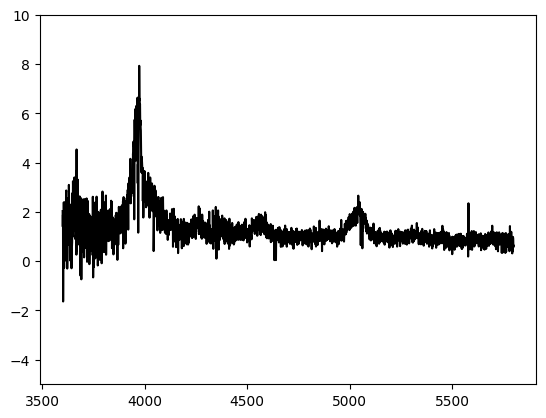

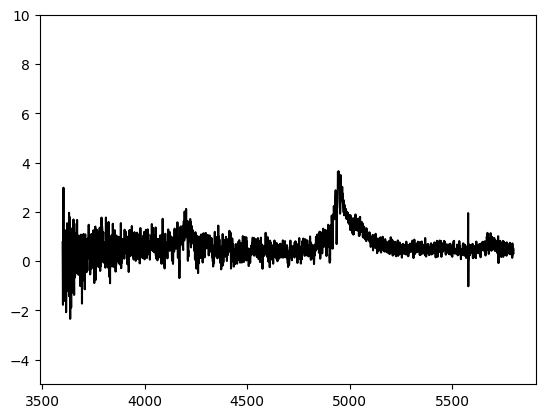

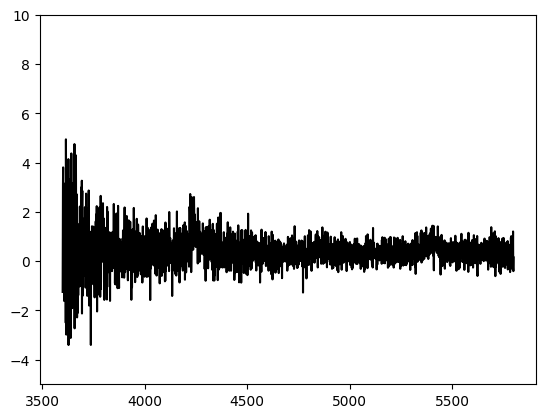

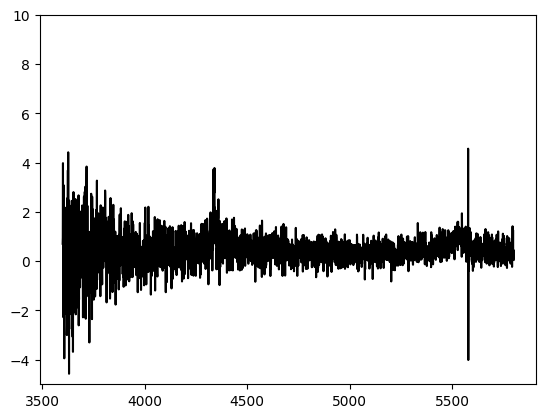

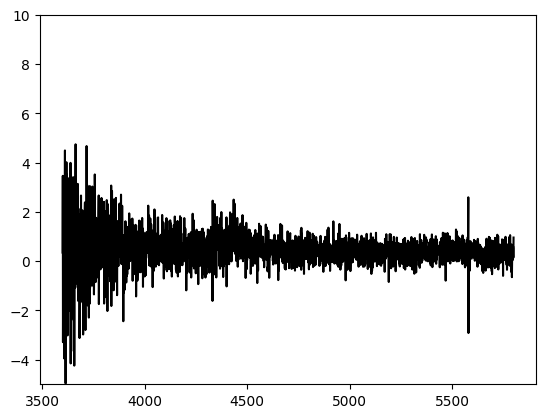

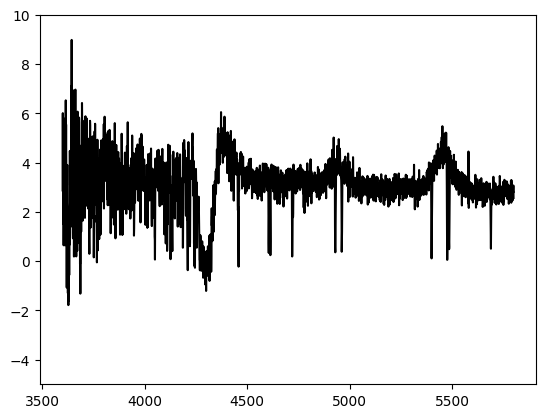

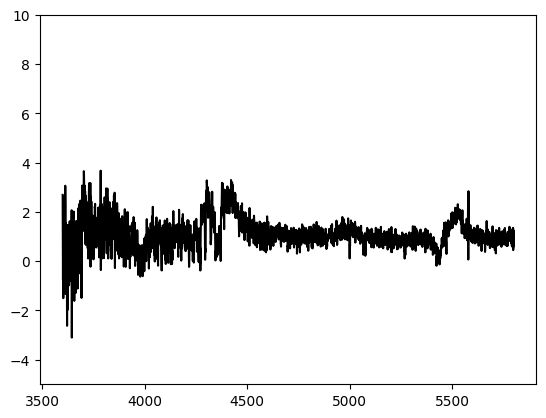

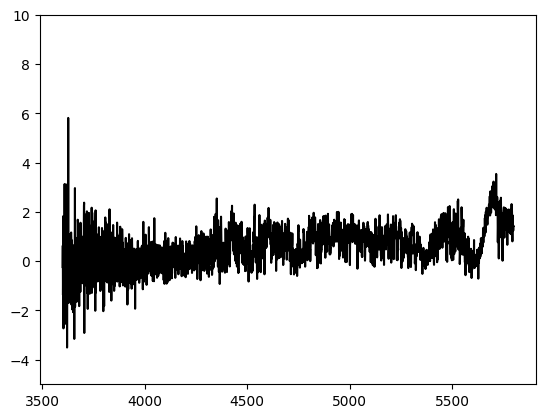

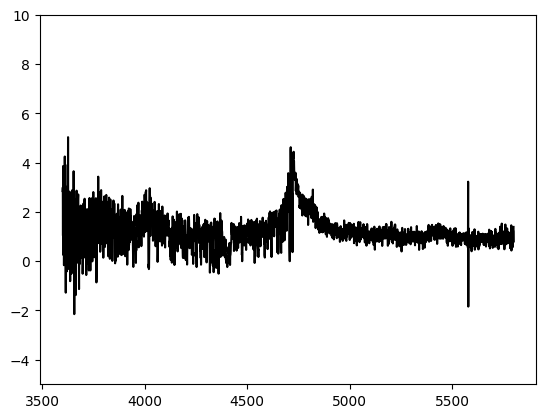

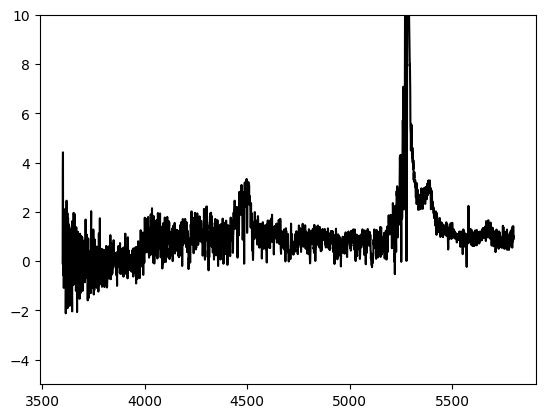

In [33]:
for i in range(10):
  plt.plot(bwave,bflux[i],'k')
  plt.ylim(-5,10)
  plt.show()

EJERCICIO

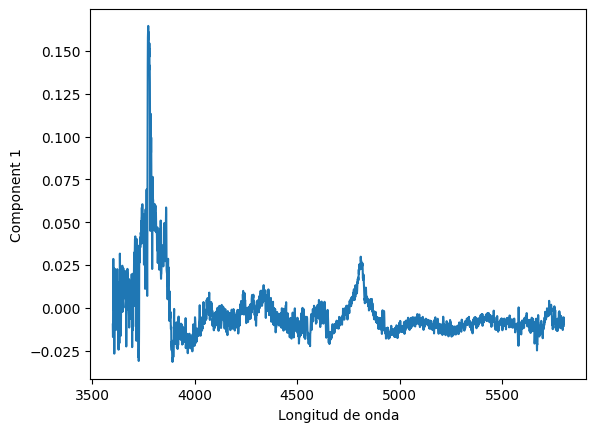

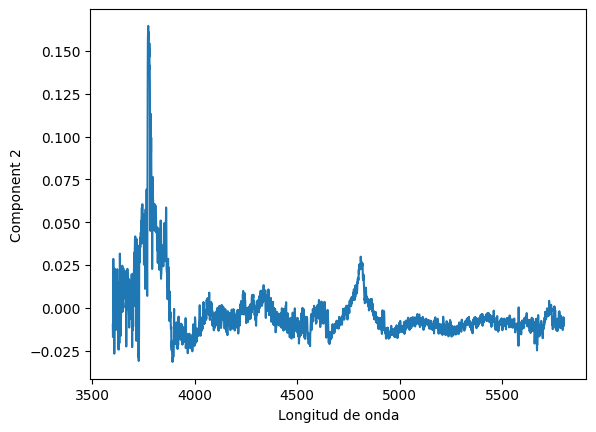

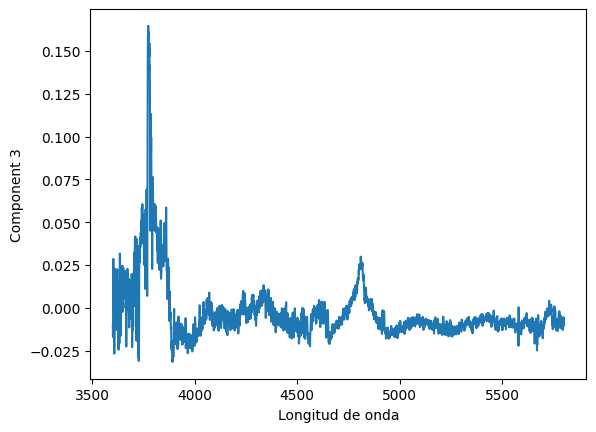

In [36]:
#Código revisado en https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

#Implementación de PCA para el flujo
from sklearn.decomposition import PCA
pca=PCA(3) #con esto indico que buscaremos los 3 mejores parámetros
pca.fit(bflux) #Buscamos los parámetros que nos dan más información del flujo

for i in range (3):
  plt.plot(bwave,pca.components_[1])
  plt.ylabel(f'Component {i+1}')
  plt.xlabel("Longitud de onda")
  plt.show()

In [37]:
#Datos adicionales del análisis de PCA
vr=pca.explained_variance_ratio_
sv=pca.singular_values_

print("Varianza explicada: ",vr)
print("Valores singulares: ",sv)

Varianza explicada:  [0.70785243 0.07080916 0.04288872]
Valores singulares:  [731.01617447 231.20666454 179.93977576]


In [57]:
#Datos adicionales del análisis de PCA
vr=pca.explained_variance_ratio_
sv=pca.singular_values_

print("Varianza explicada: ",vr)
print("Valores singulares: ",sv)

Varianza explicada:  [0.70785243 0.07080916 0.04288872]
Valores singulares:  [731.01617447 231.20666454 179.93977576]


In [59]:
zcat=Table.read("/content/zall-pix-edr-vac.fits",hdu=1)
#cheque en teams y el error es porque el archivo no se sube completo, pero a mi me aparece que ya se subió y aún así no funciona
zcat

ValueError: ignored

In [47]:
zcat=zcat['TARGETID','SURVEY','SPECTYPE','Z'] #redefinimos la tabla usando sólo los parámetros que nos interesan
zcat

NameError: ignored

In [ ]:
mask=zcat["SURVEY"]=='sv3' #filtramos "survey" para sólo considerar los que tengan sv3
zcat=zcat[mask]
zcat

In [ ]:
mask=np.in1d(zcat["TARGETID"],tids)  #ahora filtraremos los id para usar unicamente los target id identificados en nuestro espectro
zcat=zcat[mask]
zcat

In [ ]:
lya=1216 #Lyman-alpha emission
#graficar el corrimiento al rojo de los primeros 10 targetid

for i,tid in enumerate(zcat["TARGETID"][:10]):
  z=zcat["Z"][i]
  indx=np.where(tids==tid)[0][0]
  plt.plot(bwave,bflux[indx])
  plt.axvline(1216*(1+z),color='r')
  plt.show()

In [ ]:
lya=1216

for i,tid in enumerate(zcat["TARGETID"][:10]): #graficar el corrimiento al rojo de los primeros 10 targetid, PERO para un marco en reposo, -por el factor 1/(1+z)
  z=zcat["Z"][i]
  indx=np.where(tids==tid)[0][0]
  plt.plot(bwave/(1+z),bflux[indx])
  plt.axvline(1216,color='red')
  plt.show()

Exercise

In [ ]:
#código consultado en https://docs.scipy.org/doc/scipy/tutorial/interpolate.html
from scipy import interpolate
#En general lo que haremos es encontrar los minimos y maximos del redshifting para calcular la longitud de onda, con eso construir un arreglo que nos permita usar el interpolar de scipy
#Notemos que hay que usar el factor 1/(1+z) para convertir al reposo, en lugar de z usaremos los maximos y minimos del red shifting

NameError: ignored